## PC Composites for "Greatest Value" Incidences. 

In other words, just looking at cross sections of these PCs of EOFs for U/GPH/EHF when they are largest + composites of what is physically occurring those same dates. 

File created 6/24/2025

In [1]:
#import cell first
%matplotlib inline
import numpy as np
import pandas as pd
import math
from random import seed
from random import randint
from random import sample
import xarray as xr

import pickle

##plotting related imports
import matplotlib.pyplot as plt

from EOF_def import EOF_def

In [2]:
#load input data
infile = open("../eof_data/vertanom_u.p","rb",)
u_input = pickle.load(infile)  ##vertical U cross section
flat_u_14 = u_input[:62, 19:168, :, :].reshape((62 * 149, 37, 36))
infile.close()

infile = open("../eof_data/vertanom_ehf.p","rb",)
ehf_input = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
flat_EHF_14 = ehf_input[:62, 19:168, :, :].reshape((62 * 149, 37, 180))
infile.close()

infile = open("../eof_data/vertanom_gph.p","rb",)
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
flat_GPH_14= gph_input[:62, 19:168, :, :].reshape((62 * 149, 37, 180))
infile.close()

print("U Wind shape: ",flat_u_14.shape)
print("EHF shape: ",flat_EHF_14.shape)
print("GPH shape: ",flat_GPH_14.shape)

U Wind shape:  (9238, 37, 36)
EHF shape:  (9238, 37, 180)
GPH shape:  (9238, 37, 180)


In [3]:
##conduct EOF analysis/retrieve PC timeseries
#load input solvers
infile = open("../eof_analysis/solvers/Usolver_full.p","rb",)
Usolver = pickle.load(infile)  
infile.close()

infile = open("../eof_analysis/solvers/EHFsolver_full.p","rb",)
EHFsolver = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
infile.close()

infile = open("../eof_analysis/solvers/GPHsolver_full.p","rb",)
GPHsolver = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
infile.close()


## U
U_EOF_nw, U_EOF_nw2d, U_eigenv, U_VarEx, U_PC = EOF_def(Usolver, 10)
## EHF
EHF_EOF_nw, EHF_EOF_nw2d, EHF_eigenv, EHF_VarEx, EHF_PC = EOF_def(EHFsolver, 45)
## GPH
GPH_EOF_nw, GPH_EOF_nw2d, GPH_eigenv, GPH_VarEx, GPH_PC = EOF_def(GPHsolver, 10)

<class 'numpy.ndarray'> (9238, 10)
<class 'numpy.ndarray'> (9238, 45)
<class 'numpy.ndarray'> (9238, 10)


In [4]:
##set lat and lon arrays
##separate set of longitudes for PV and others
lat = np.arange(90, 18, -2)
print("Len latitudes: ", len(lat))
lon = np.arange(0, 360, 2)
print("Len longitudes: ", len(lon))


lev = np.array([1., 2., 3., 5., 7., 10., 20., 30., 50., 70., 100., 125., 150., 175., 200., 225., 250., 300., 350., 400., 
                450., 500., 550., 600., 650., 700., 750., 775., 800., 825., 850., 875., 900., 925., 950., 975., 1000.])
print("Len levels: ", len(lev))

Len latitudes:  36
Len longitudes:  180
Len levels:  37


Now ... I am going to have to designate the PC of interest. 

I will have to search and etablish when it is the greatest, save the indices, and plot composites. 

For the sake of the instances currently observed (Europe at 14 days lead time), PC 3 for U wind, PCs 2 and 4 for GPH are the three most highly selected features. I will plot the composites of each feature on days where each feature is most prominent. This is gonna be a six panel plot: Strong - PC days and composite, Strong + PC days and composite ... for different features by PC. 

In [124]:
#designate PC of interest 
PC_timeseries = GPH_PC
designate_index = 3

#select indices where abs(designate_index) is largest and 
pos_indices = []
neg_indices = []

#begin checking
for i in range(0,len(PC_timeseries[:,0])):
    #print(i)
    timestep = PC_timeseries[i,:]
    abs_compare = abs(PC_timeseries[i,designate_index])
    
    is_larger = True
    #begin checking whether or not the value is largest
    for j in range(len(timestep)):
        if j != designate_index:
            #print("checking ...")
            if abs(timestep[j]) >= abs_compare:
                is_larger = False
                break
        #at this point it checks if any are larger and, if yes, it breaks 
        #so sustaining means that it is largest
    if is_larger:
        non_abs = timestep[designate_index]
        if non_abs > 0:
            pos_indices.append(i)
        elif non_abs < 0:
            neg_indices.append(i)

### Positive and Negative here are indicative of the sign of the magnitude of the PC during the timeseries. 

In [125]:
#designate and take compospite for each feature from these indices
flat_u_pos = flat_u_14[pos_indices,:,:]
flat_EHF_pos = flat_EHF_14[pos_indices,:,:]
flat_GPH_pos = flat_GPH_14[pos_indices,:,:]

flat_u_neg = flat_u_14[neg_indices,:,:]
flat_EHF_neg = flat_EHF_14[neg_indices,:,:]
flat_GPH_neg = flat_GPH_14[neg_indices,:,:]

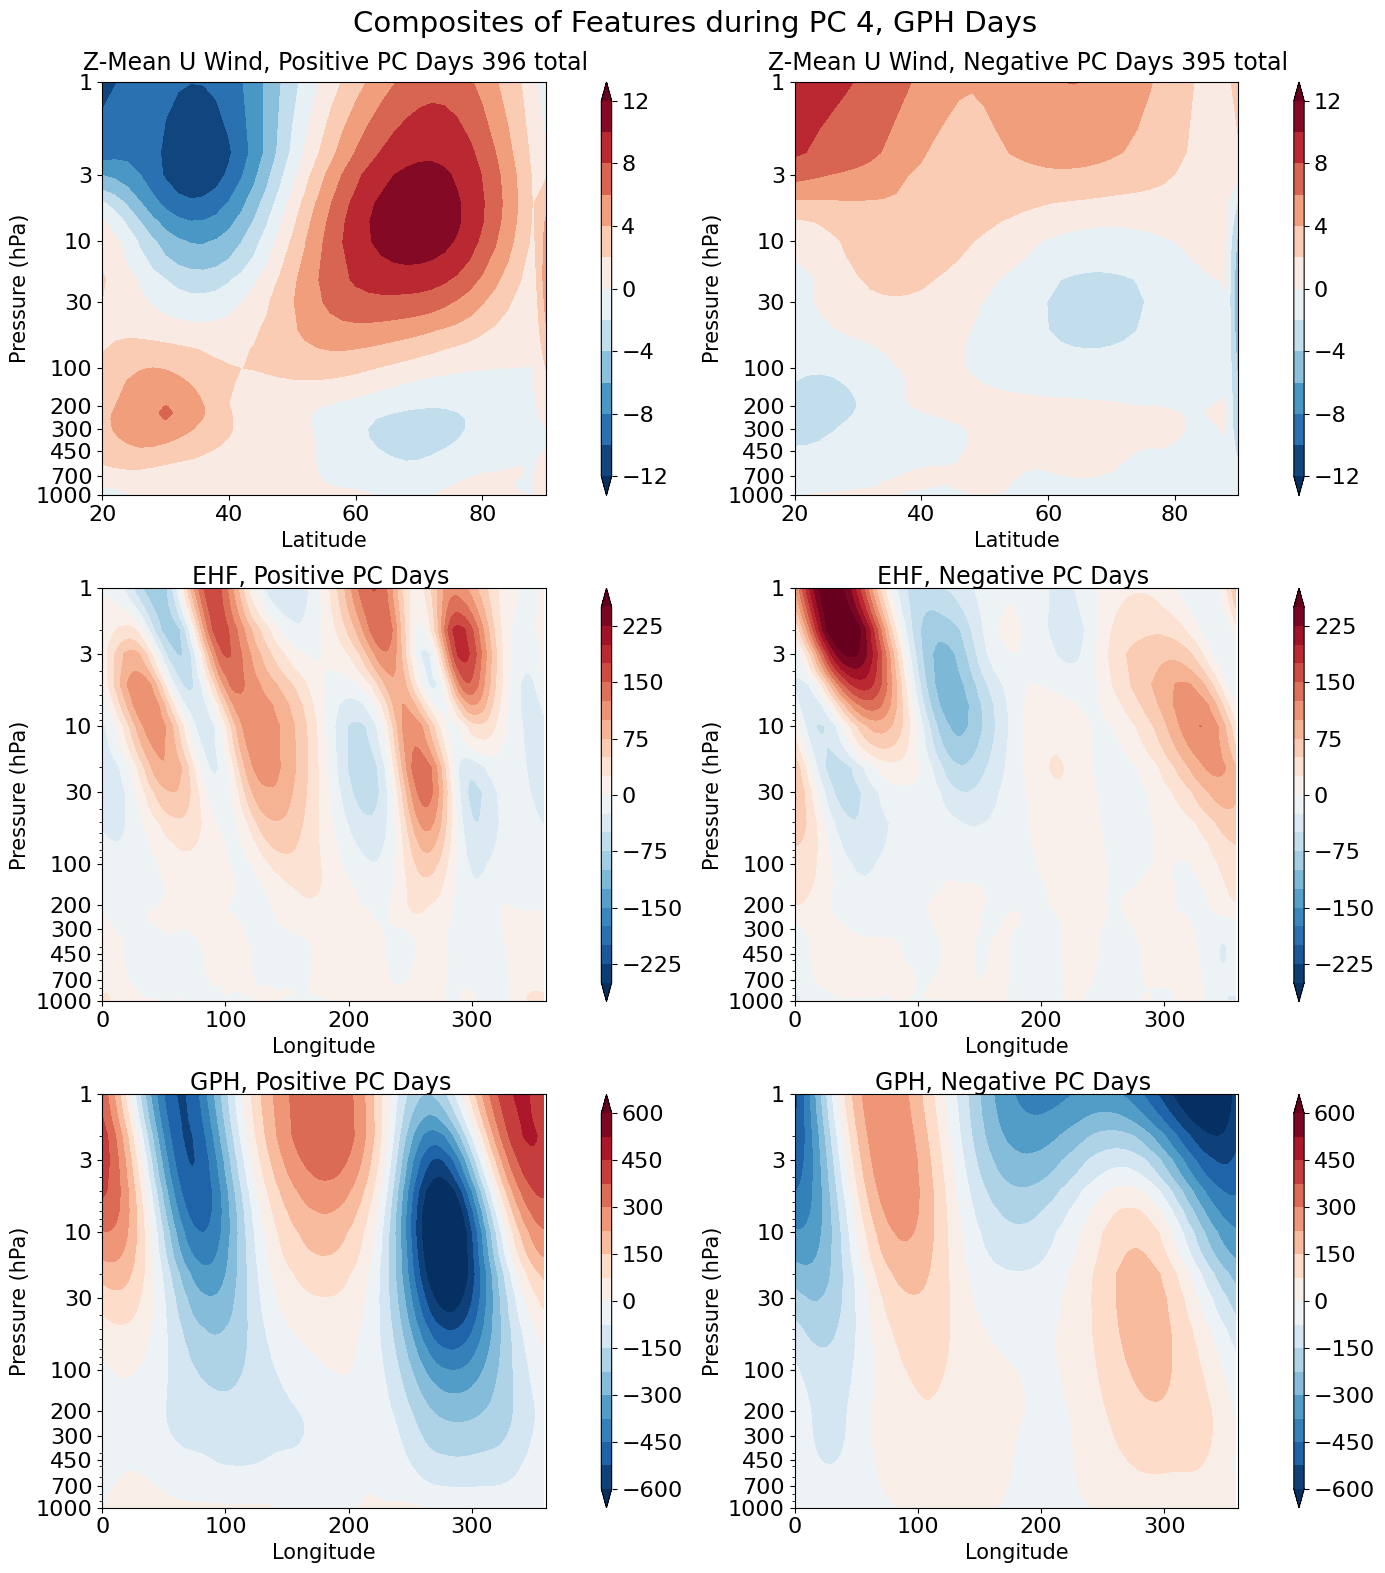

In [126]:
fs = 18
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
plt.suptitle("Composites of Features during PC 4, GPH Days",fontsize=21)   

titles = ["Positive PC Days ", "Negative PC Days "]
len_days = [len(pos_indices),len(neg_indices)]
data = [flat_u_pos,flat_u_neg,flat_EHF_pos,flat_EHF_neg,flat_GPH_pos,flat_GPH_neg]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 6):
    color = "RdBu_r"
    # colorbar options:
    if i == 0 or i ==1:
        colorbarMin = -12
        colorbarMax = 12
        colorspace = 2

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("Z-Mean U Wind, "+str(titles[i])+str(len_days[i])+" total", fontsize=fs-1, y=1.01,x=0.525)

        h = axes[i].contourf(
            lat,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        # colorLabel='Z (m)'
        # cbar.set_label(label=colorLabel,fontsize=10)

        axes[i].tick_params(labelsize=fs-2)
        axes[i].invert_yaxis()
        axes[i].set_yscale('symlog')
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(20, 90)
        axes[i].set_xlabel('Latitude', fontsize=fs-3)
                          
    if i == 2 or i == 3:
        colorbarMin = -250
        colorbarMax = 250
        colorspace = 25

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("EHF, "+str(titles[i-2]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)
                          
    if i == 4 or i == 5:
        colorbarMin = -600
        colorbarMax = 600
        colorspace = 75

        clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
        axes[i].set_title("GPH, "+str(titles[i-4]), fontsize=fs-1, y=0.99) 
                          
        h = axes[i].contourf(
            lon,
            lev,
            np.nanmean(data[i], axis = 0),
            clevel,
            cmap=color,
            extend="both",
        )
        cbar = plt.colorbar(
            h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
        )
        cbar.ax.tick_params(labelsize=fs-2)
        axes[i].tick_params(labelsize=fs-2)
        axes[i].set_yscale('log')
        axes[i].invert_yaxis()
        axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
        axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
        axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

        axes[i].set_xlim(0, 360)
        axes[i].set_xlabel('Longitude', fontsize=fs-3)


plt.tight_layout()
plt.subplots_adjust(top=0.935)
plt.savefig("GPH4_Composites.png")
plt.show()